In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read results into dataframe
mreib= './opt_hype/0058308.txt'
smrib= './opt_hype/0058208.txt'

### Quartiles

In [3]:
def prepare_quantiles(file_path):
    """
    Reads a tab-separated file into a pandas DataFrame with the first column as the index.

    Parameters:
    file_path (str): The path to the file to read.

    Returns:
    pd.DataFrame: The resulting DataFrame.
    """
    flow= pd.read_csv(file_path, index_col=0, sep='\t')
   # flow= pd.read_excel(file_path, index_col=0)
    
    flow = flow.drop(flow.index[0])
    
    # Ensure the index is datetime
    flow.index = pd.to_datetime(flow.index)
    
    # Ensure the 'cout' column is of float type
    flow['cout'] = flow['cout'].astype(float)
    flow['rout'] = flow['rout'].astype(float)
    
    # Assuming 'pivoted' is your DataFrame
    flow['rout'].replace(-9999.0, np.nan, inplace=True)
    
    # Convert flow from cfs to cms
   # flow['cout'] *= 0.0283168  # Convert 'cout' from cfs to cms
   # flow['rout'] *= 0.0283168  # Convert 'rout' from cfs to cms
    
    # Extract the day of the year
    flow['day_of_year'] = flow.index.dayofyear
    flow['year'] = flow.index.year

    # Pivot the data to have days of the year as rows and years as columns
    pivoted_sim = flow.pivot_table(values='cout', index='day_of_year', columns='year')

    # pivot rout
    pivoted_obs = flow.pivot_table(values='rout', index='day_of_year', columns='year')

    # Assuming 'pivoted' is your DataFrame
   # pivoted_obs.replace(-9999.0, np.nan, inplace=True)

    # Calculate quartiles for each day of the year
    quartiles_sim = pivoted_sim.quantile([0.025, 0.5, 0.975], axis=1)

    quartiles_obs = pivoted_obs.quantile([0.025, 0.5, 0.975], axis=1)

    return quartiles_sim, quartiles_obs, pivoted_sim, pivoted_obs

In [4]:
mreib_quartile_sim, mreib_quartile_obs, mreib_pivoted_sim, mreib_pivoted_obs= prepare_quantiles(mreib)

In [5]:
smrib_quartile_sim, smrib_quartile_obs, smrib_pivoted_sim, smrib_pivoted_obs= prepare_quantiles(smrib)

In [8]:
mreib_pivoted_sim

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
day_of_year,,,,,,,,,,,,,,,,,,,,,
1,0.000,7.746,0.193,0.132,0.053,0.066,2.709,1.329,0.177,0.002,...,2.409,0.108,0.017,0.090,0.109,1.126,4.078,0.064,0.577,0.702
2,0.008,6.104,0.191,0.132,0.052,0.072,2.633,1.247,0.174,0.002,...,1.653,0.133,0.016,0.100,0.106,1.246,3.804,0.064,0.406,0.699
3,0.045,4.483,0.189,0.131,0.057,0.077,2.559,1.192,0.172,0.004,...,1.180,0.232,0.016,0.104,0.102,1.336,3.318,0.062,0.283,0.692
4,0.097,3.195,0.187,0.129,0.095,0.081,2.491,1.149,0.169,0.017,...,0.915,0.446,0.019,0.101,0.100,1.388,2.872,0.061,0.203,0.685
5,0.740,2.307,0.184,0.141,0.247,0.083,2.432,1.111,0.166,0.058,...,0.781,0.756,0.038,0.096,0.098,1.393,2.742,0.060,0.156,0.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3.173,0.205,0.141,0.057,0.050,3.020,2.131,0.193,0.006,2.581,...,0.075,0.020,0.052,0.153,0.690,2.875,0.061,0.541,0.727,0.003
363,5.222,0.199,0.134,0.056,0.052,2.940,1.894,0.189,0.004,2.700,...,0.083,0.019,0.052,0.133,0.698,3.238,0.062,0.828,0.715,0.003
364,7.431,0.196,0.131,0.055,0.054,2.863,1.658,0.184,0.003,2.759,...,0.094,0.018,0.055,0.121,0.799,3.680,0.064,0.900,0.707,0.003


### Hydrograph

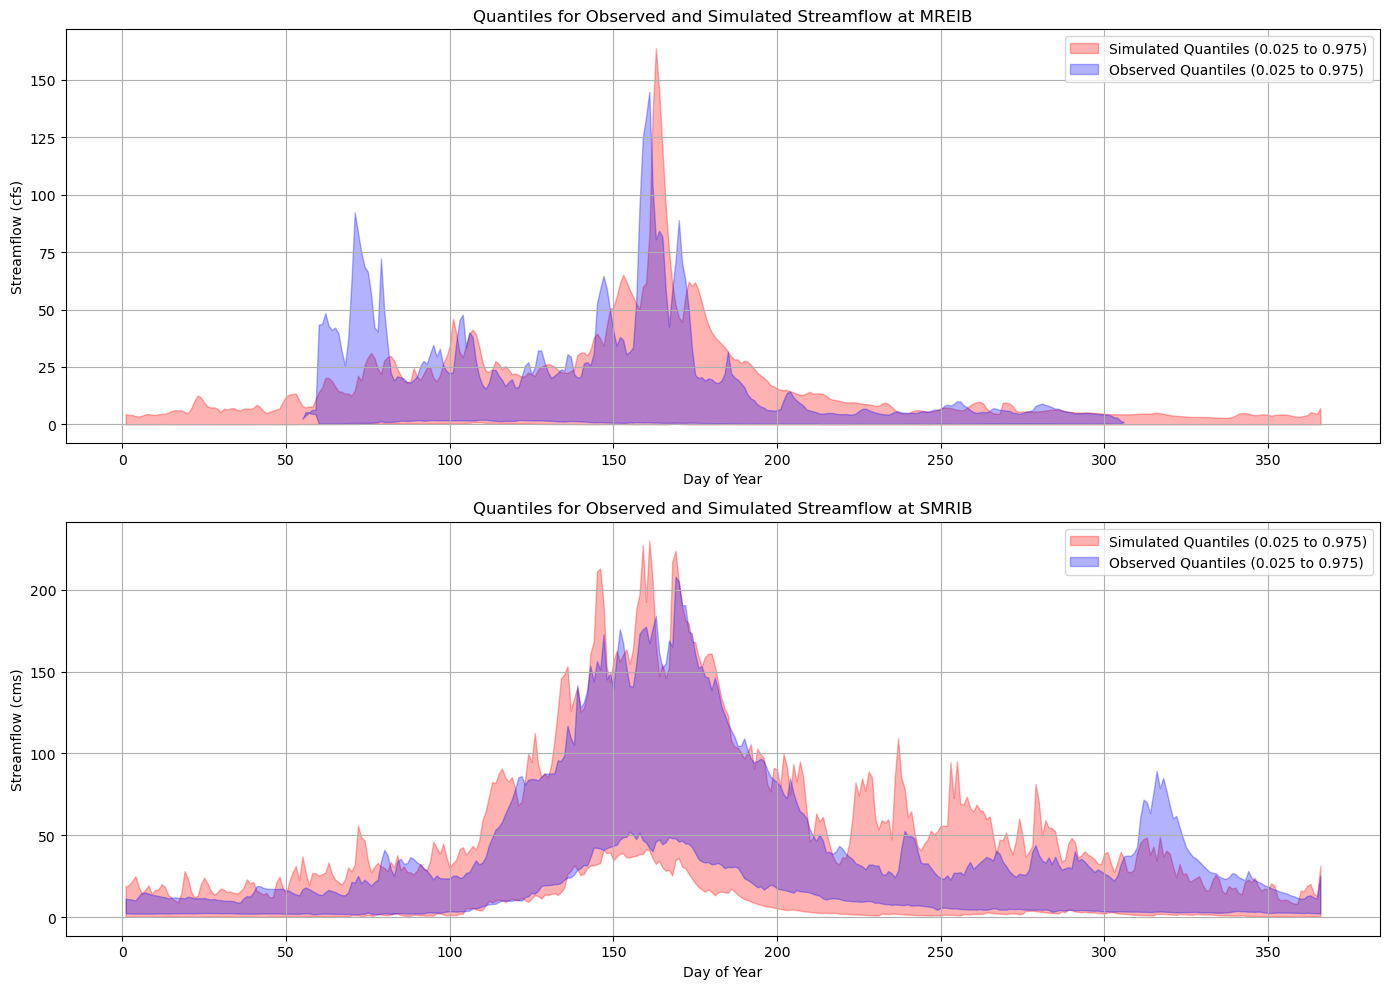

In [6]:
# Plotting for MREIB
plt.figure(figsize=(14, 10))  # Adjust the figure size if needed

plt.subplot(2, 1, 1)  # Subplot for MREIB

# Fill the region between the lower and upper quartiles for simulated data at MREIB
plt.fill_between(mreib_pivoted_sim.index, mreib_quartile_sim.loc[0.025], mreib_quartile_sim.loc[0.975], color='red', alpha=0.3, label='Simulated Quantiles (0.025 to 0.975)')

# Fill the region between the lower and upper quartiles for observed data at MREIB
plt.fill_between(mreib_pivoted_obs.index, mreib_quartile_obs.loc[0.025], mreib_quartile_obs.loc[0.975], color='blue', alpha=0.3, label='Observed Quantiles (0.025 to 0.975)')

plt.xlabel('Day of Year')
plt.ylabel('Streamflow (cfs)')
plt.title('Quantiles for Observed and Simulated Streamflow at MREIB')
plt.grid(True)
plt.legend()

# Plotting for SMRIB
plt.subplot(2, 1, 2)  # Subplot for SMRIB

# Fill the region between the lower and upper quartiles for simulated data at SMRIB
plt.fill_between(smrib_pivoted_sim.index, smrib_quartile_sim.loc[0.025], smrib_quartile_sim.loc[0.975], color='red', alpha=0.3, label='Simulated Quantiles (0.025 to 0.975)')

# Fill the region between the lower and upper quartiles for observed data at SMRIB
plt.fill_between(smrib_pivoted_obs.index, smrib_quartile_obs.loc[0.025], smrib_quartile_obs.loc[0.975], color='blue', alpha=0.3, label='Observed Quantiles (0.025 to 0.975)')

plt.xlabel('Day of Year')
plt.ylabel('Streamflow (cms)')
plt.title('Quantiles for Observed and Simulated Streamflow at SMRIB')
plt.grid(True)
plt.legend()

# Adjust layout and save the plot as a PNG file
plt.tight_layout()
plt.savefig('prms_mreib_and_smrib_quantiles.png')

plt.show()